It is important to test the robustness of the model by seeing it work on a different dataset. We chose a sleep dataset since each raw trial can be segmented in epochs corresponding to a specific sleep stage.

In this sense, given that each sleep stage generates a specific behaviour in the brain, they are in general associated with different bands. In general, a wave from a stage-1 state is characterized by relatively low-frequencies (alpha, ranging from 8-12Hz, and theta, from 4-7 Hz), while a deeper sleep, on stages 2 and 3, have mostly even lower frequencies on the delta band (0.5-4 Hz). During REM sleep, however, waves present patterns similar to the ones observed in wakefulness.

It could be interesting to try to find the most relevant patterns and peak frequencies from each sleep stage by using the CSC approach developed by the paper.

In [1]:
import copy

from functions import find_peaks, display_atoms, display_topomap, display_ffts



In [6]:
# Here, we load the data from a sleep stage dataset from one single subject.
# We separate the resultant epochs into their stage so we can analyse if there is
# some pattern that the CSC model can recognize to distinguish between stages.

from mne_data import load_data, separate_sleep_stages

sfreq = 100

t_lim = (0, 30 - 1/sfreq)
X, info = load_data(dataset='sleep', epoch=t_lim, sfreq=sfreq)

X_stages = separate_sleep_stages(X, info)

stages = ['Sleep stage W','Sleep stage 1','Sleep stage 2','Sleep stage 3/4','Sleep stage R']


In [7]:
X_stages['Sleep stage 1'][:,None,:].shape

(218, 1, 1, 3000)

In [8]:
# Next, we define the parameters for multivariate CSC

# First, for solving the optimization problem using data from all stages
from alphacsc import BatchCDL

# Define the shape of the dictionary
n_atoms = 10
n_times_atom = int(round(sfreq * 1.0))  # 1000. ms

cdl = BatchCDL(
    # Shape of the dictionary
    n_atoms=n_atoms,
    n_times_atom=n_times_atom,
    # Request a rank1 dictionary with unit norm temporal and spatial maps
    rank1=True, uv_constraint='separate',
    # Initialize the dictionary with random chunk from the data
    D_init='chunk',
    # rescale the regularization parameter to be 20% of lambda_max
    lmbd_max="scaled", reg=.2,
    # Number of iteration for the alternate minimization and cvg threshold
    n_iter=100, eps=1e-4,
    # solver for the z-step
    solver_z="lgcd", solver_z_kwargs={'tol': 1e-2, 'max_iter': 1000},
    # solver for the d-step
    solver_d='alternate_adaptive', solver_d_kwargs={'max_iter': 300},
    # Technical parameters
    verbose=1, random_state=0, n_jobs=6)

# Here, we define for each of the stages individually, so we search for less atoms
n_atoms_stage = 4
n_times_atom = int(round(sfreq * 1.0))  # 1000. ms

cdl_stage = BatchCDL(
    # Shape of the dictionary
    n_atoms=n_atoms_stage,
    n_times_atom=n_times_atom,
    # Request a rank1 dictionary with unit norm temporal and spatial maps
    rank1=True, uv_constraint='separate',
    # Initialize the dictionary with random chunk from the data
    D_init='chunk',
    # rescale the regularization parameter to be 20% of lambda_max
    lmbd_max="scaled", reg=.2,
    # Number of iteration for the alternate minimization and cvg threshold
    n_iter=100, eps=1e-4,
    # solver for the z-step
    solver_z="lgcd", solver_z_kwargs={'tol': 1e-2, 'max_iter': 1000},
    # solver for the d-step
    solver_d='alternate_adaptive', solver_d_kwargs={'max_iter': 300},
    # Technical parameters
    verbose=1, random_state=0, n_jobs=6)


.............
[BatchCDL] Converged after 13 iteration, (dz, du) = 9.857e-05, 7.235e-05
[BatchCDL] Fit in 808.3s


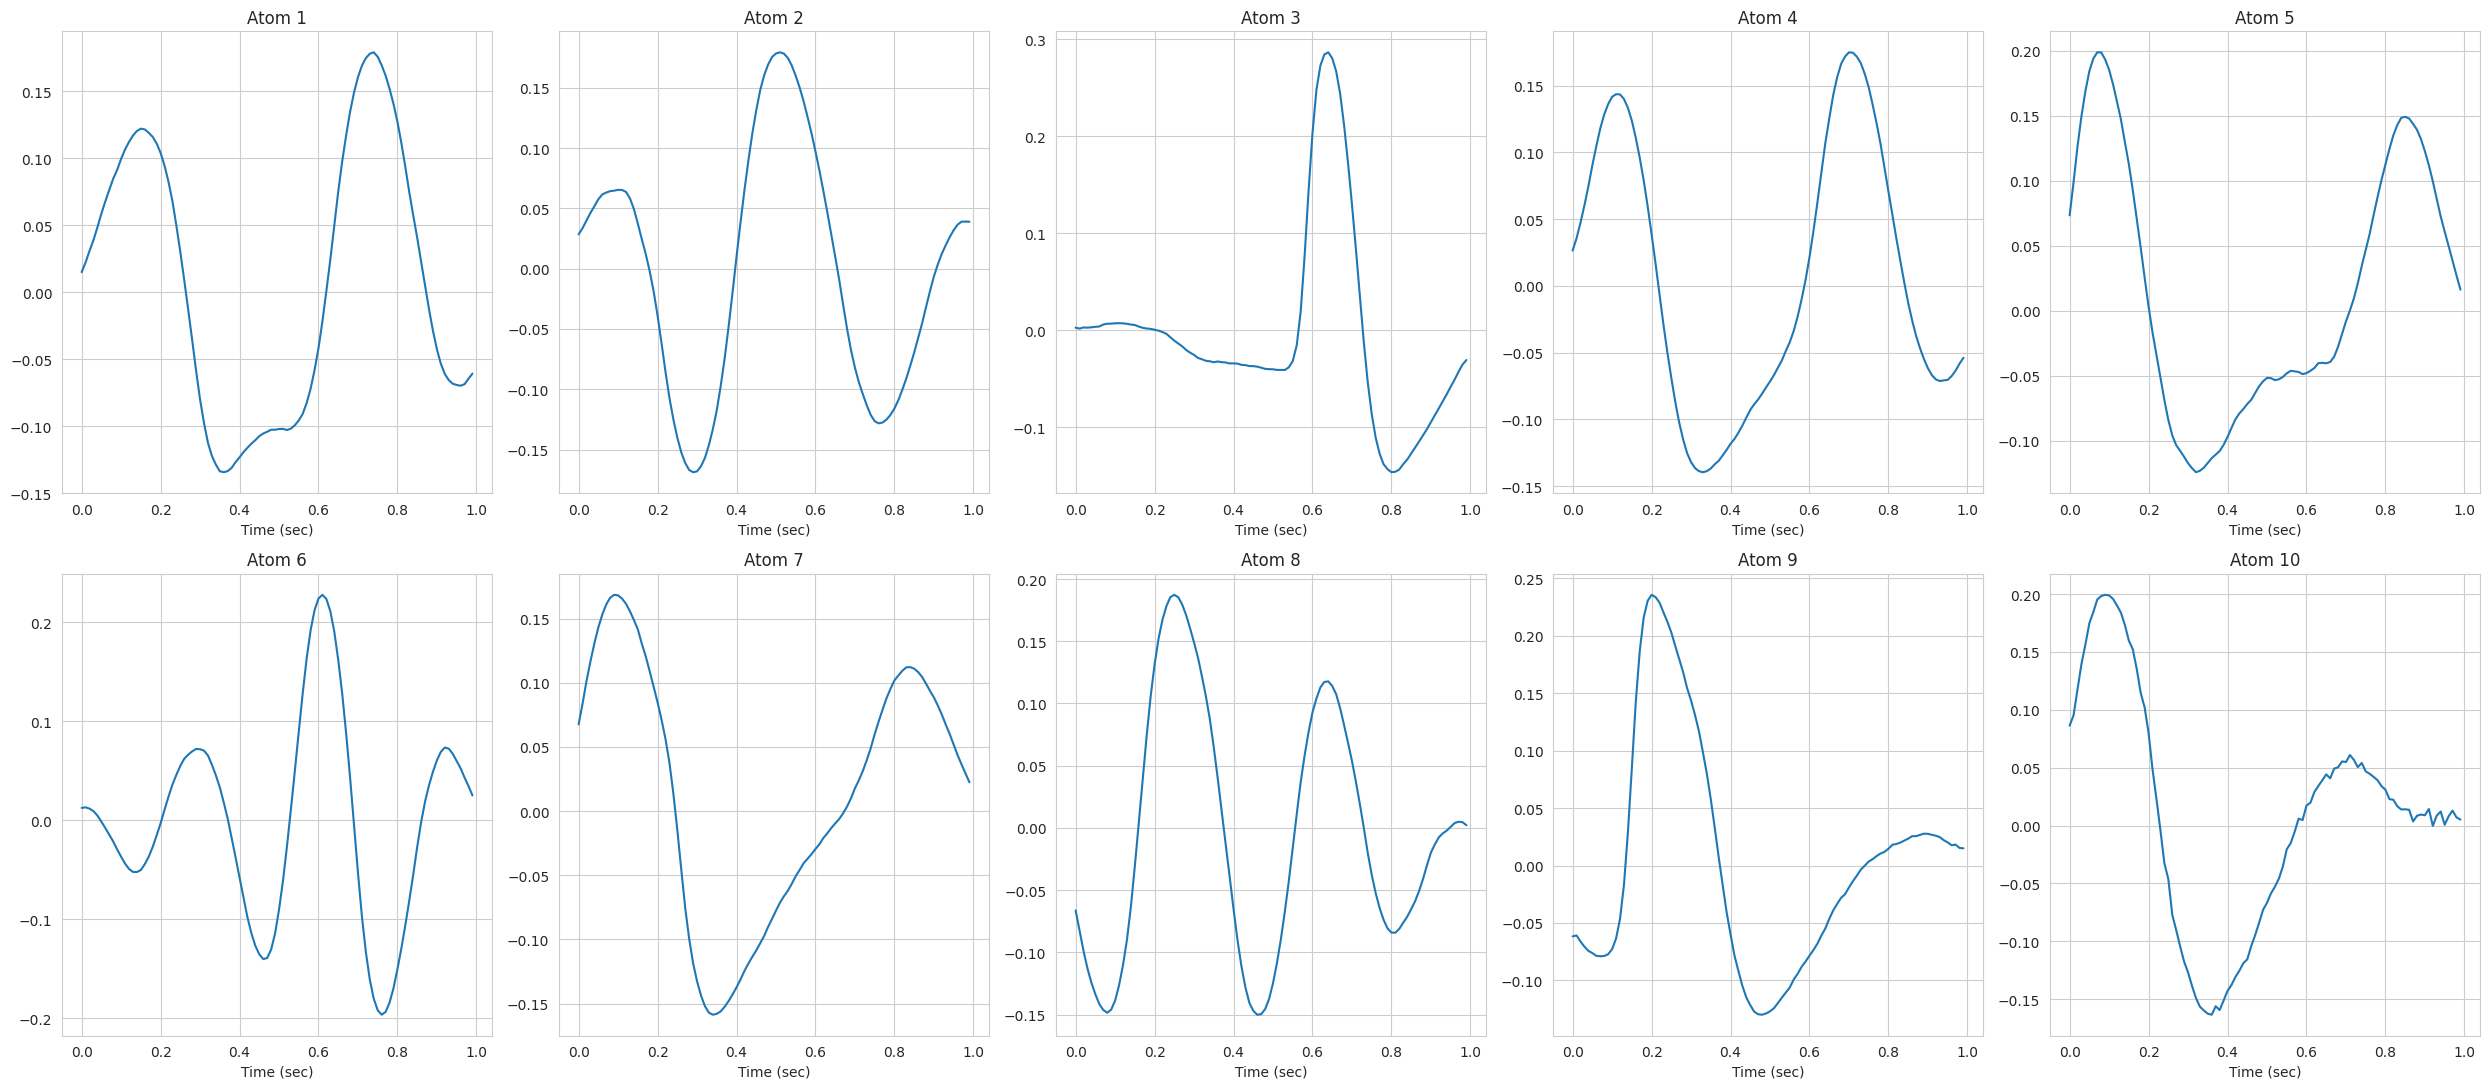

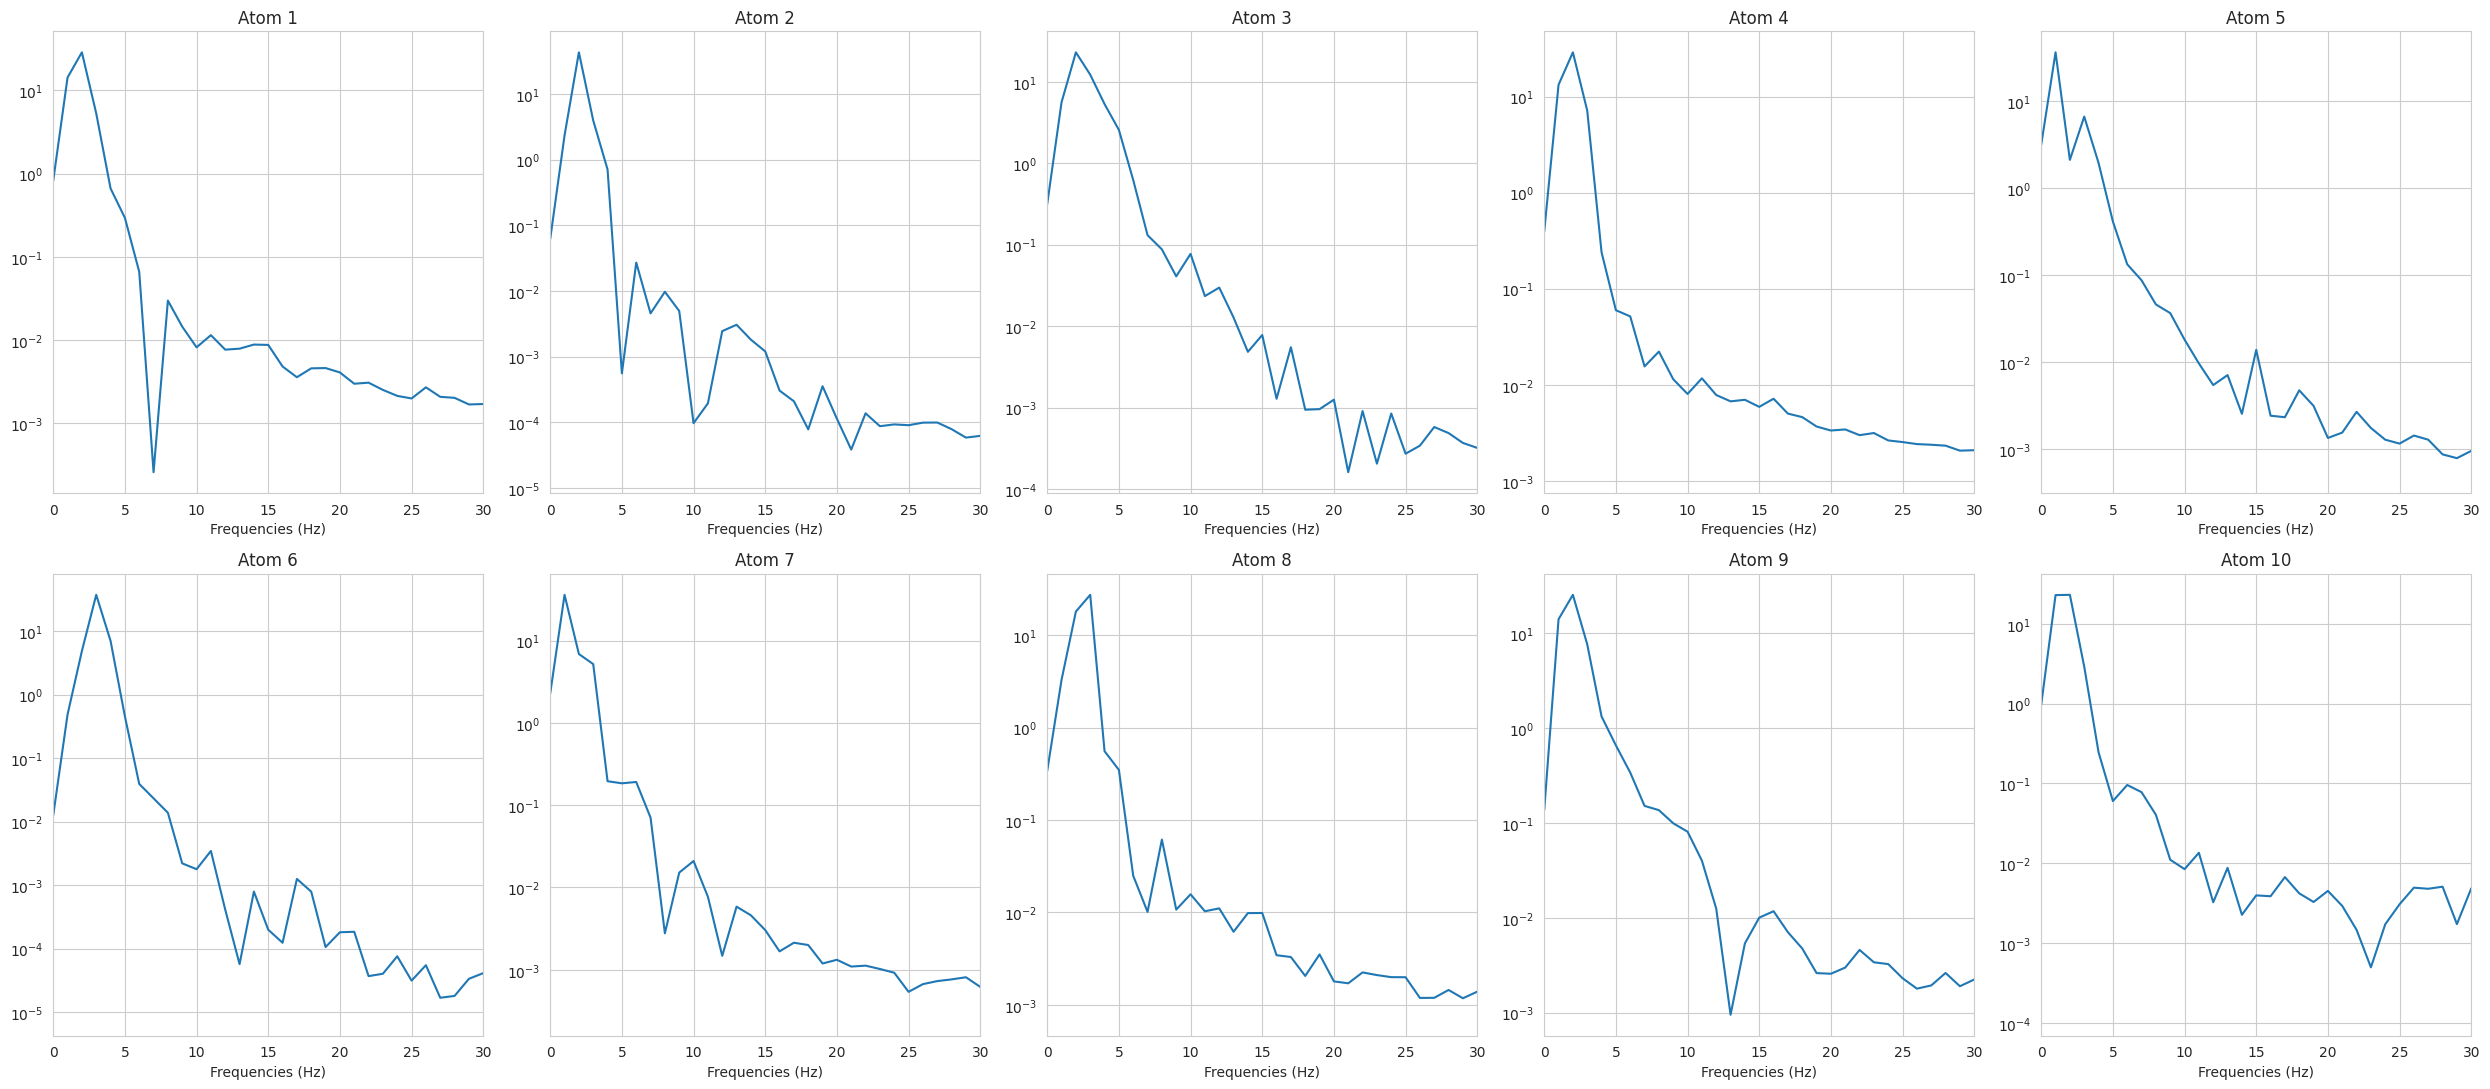

In [9]:
# Fit the model and learn rank1 atoms for all
cdl.fit(X)

###############################################################################
# display all
display_atoms(cdl, n_atoms, 2, 5, sfreq)
display_ffts(cdl, n_atoms, 2, 5, sfreq)
#display_topomap(cdl, n_atoms, 5, 5, info)


..................
[BatchCDL] Converged after 18 iteration, (dz, du) = 9.654e-05, 3.939e-05
[BatchCDL] Fit in 93.3s


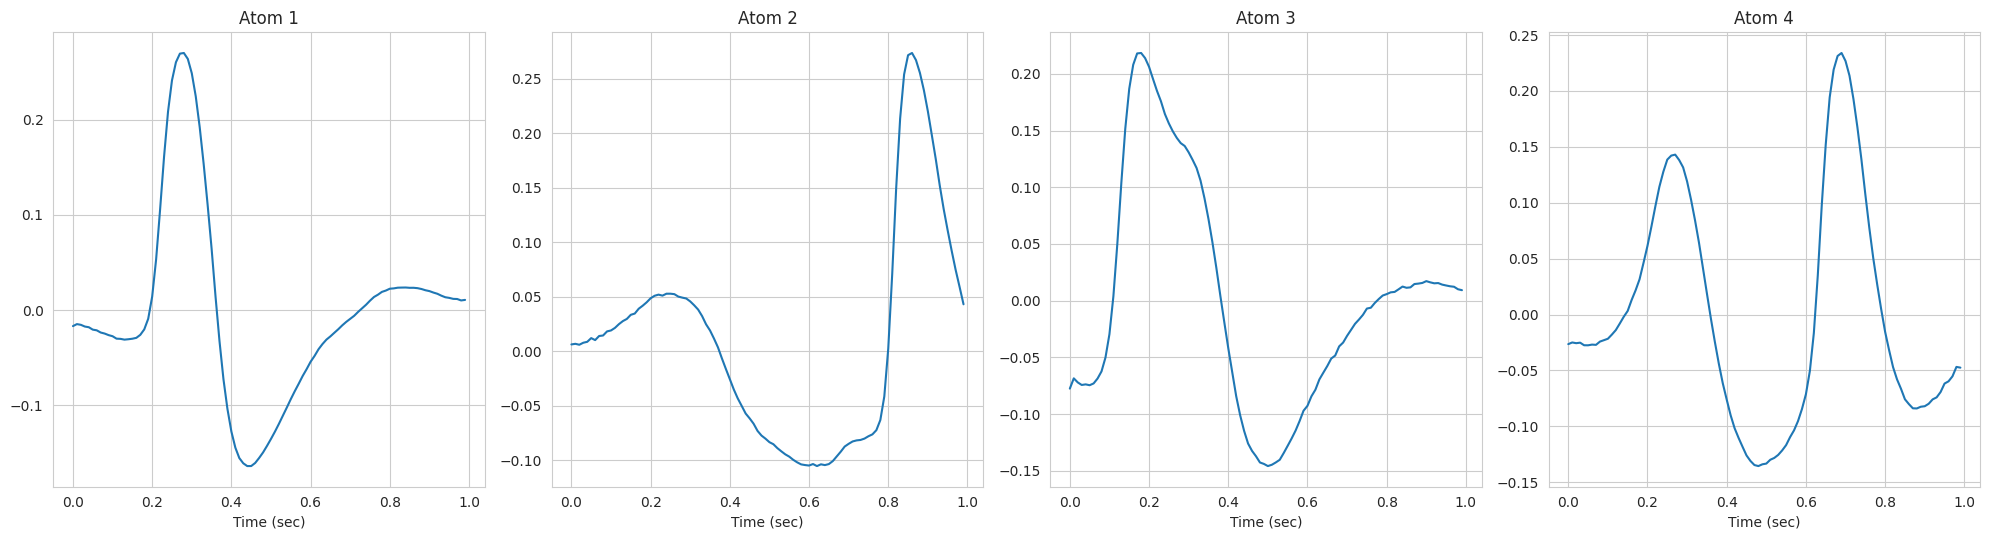

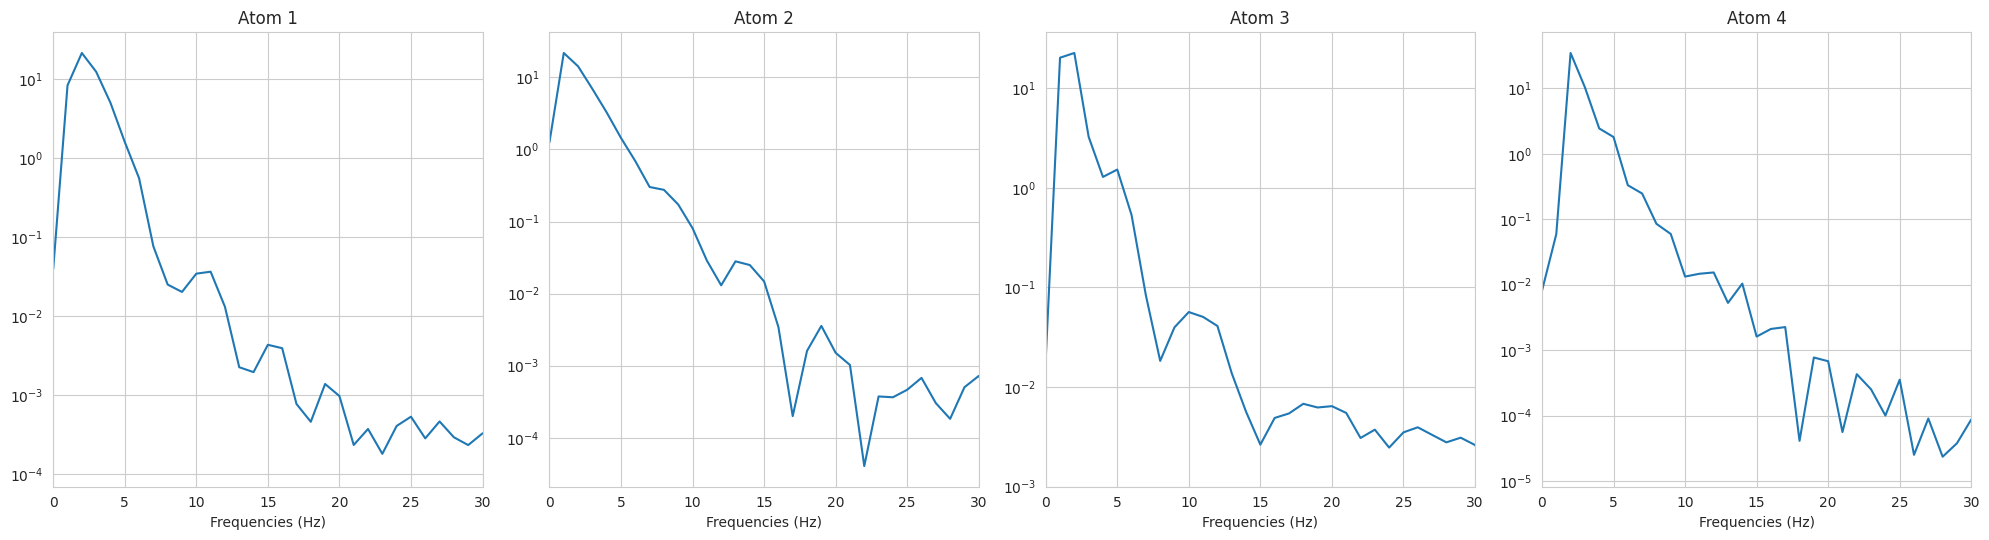

Atom 1
[2.]
 Frequency 2.0
    Delta wave
    1 most relevant channels:
    ['Fpz-Cz']
Atom 2
[1.]
 Frequency 1.0
    Delta wave
    1 most relevant channels:
    ['Fpz-Cz']
Atom 3
[2.]
 Frequency 2.0
    Delta wave
    1 most relevant channels:
    ['Fpz-Cz']
Atom 4
[2.]
 Frequency 2.0
    Delta wave
    1 most relevant channels:
    ['Fpz-Cz']
{0: {'rhythm': 'Delta', 'channels': array(['Fpz-Cz'], dtype='<U6')}, 1: {'rhythm': 'Delta', 'channels': array(['Fpz-Cz'], dtype='<U6')}, 2: {'rhythm': 'Delta', 'channels': array(['Fpz-Cz'], dtype='<U6')}, 3: {'rhythm': 'Delta', 'channels': array(['Fpz-Cz'], dtype='<U6')}}
....................
[BatchCDL] Converged after 20 iteration, (dz, du) = 9.621e-05, 6.616e-05
[BatchCDL] Fit in 43.0s


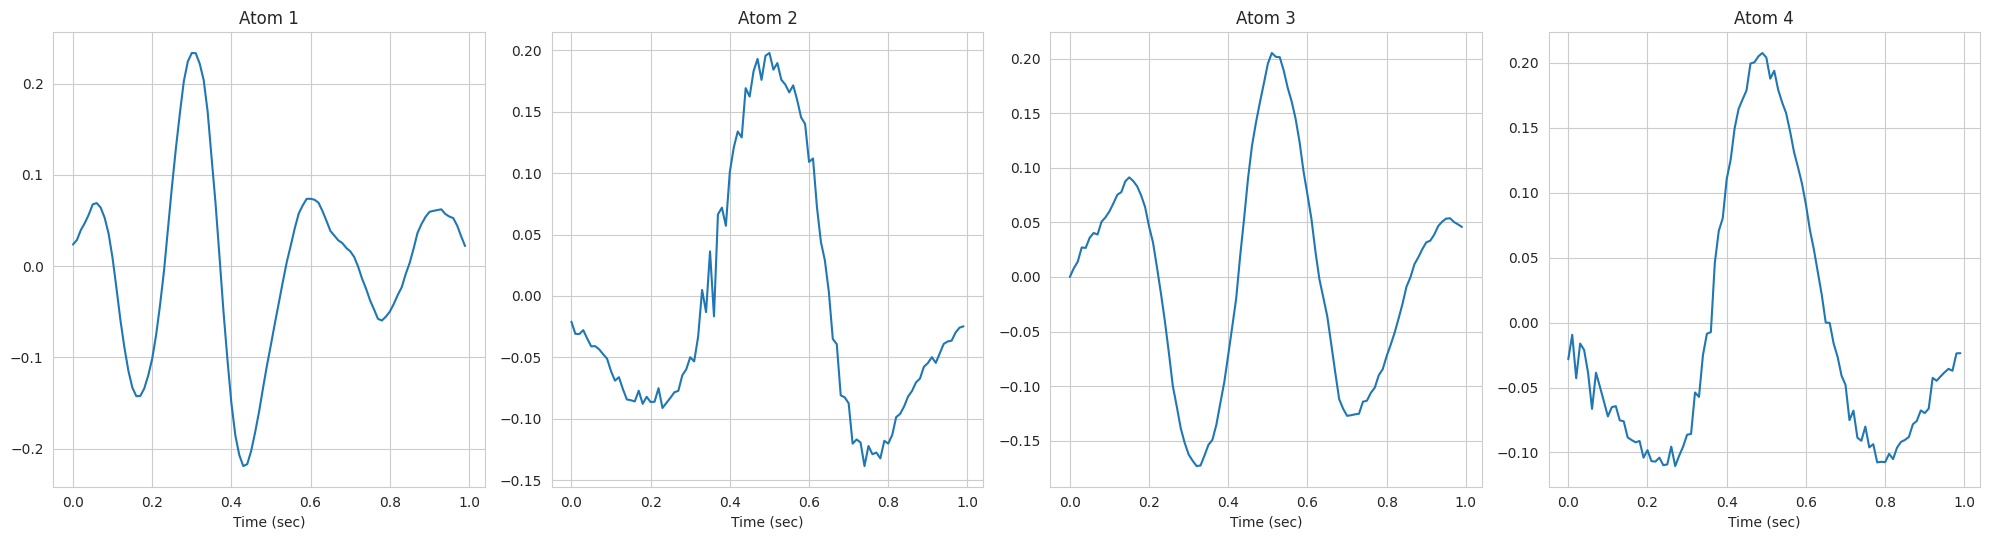

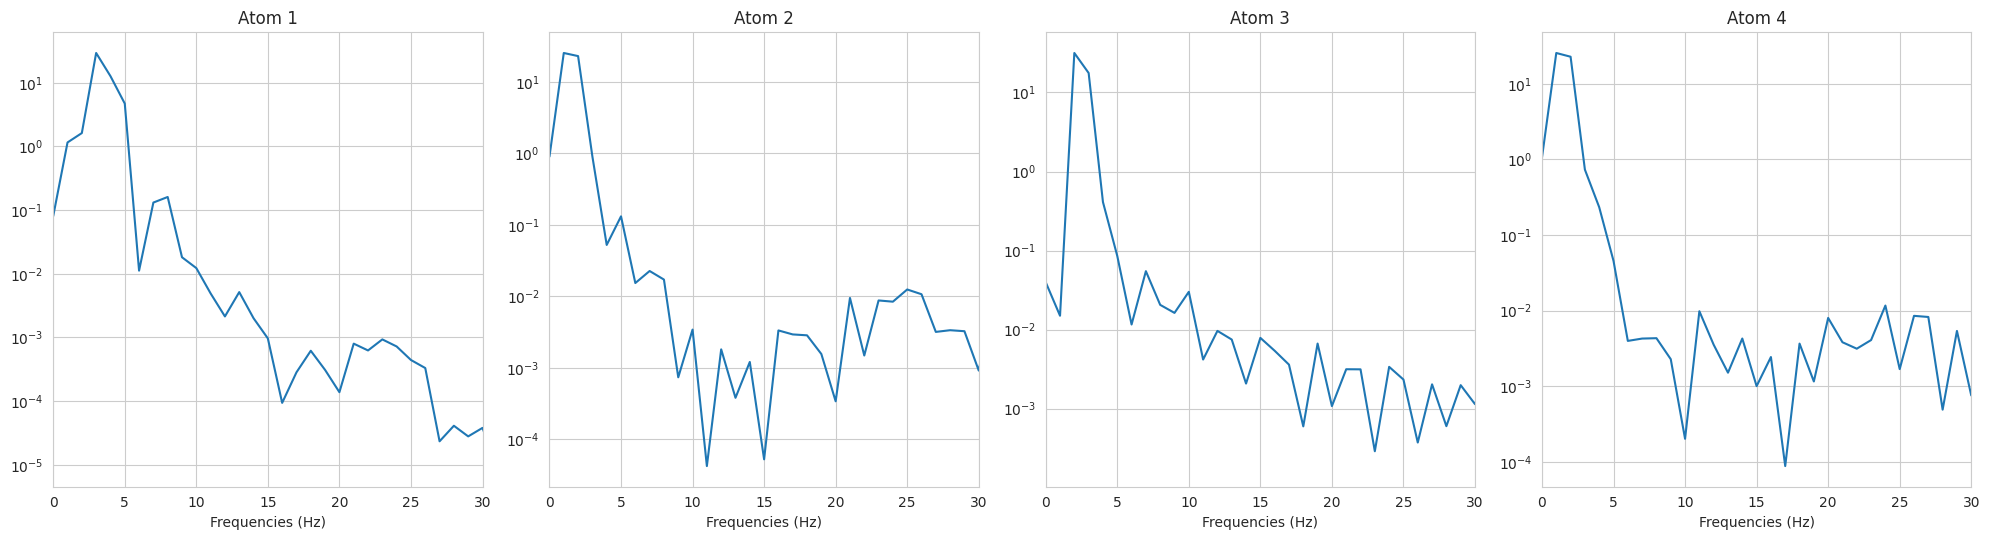

Atom 1
[3.]
 Frequency 3.0
    Delta wave
    1 most relevant channels:
    ['Fpz-Cz']
Atom 2
[1.]
 Frequency 1.0
    Delta wave
    1 most relevant channels:
    ['Fpz-Cz']
Atom 3
[2.]
 Frequency 2.0
    Delta wave
    1 most relevant channels:
    ['Fpz-Cz']
Atom 4
[1.]
 Frequency 1.0
    Delta wave
    1 most relevant channels:
    ['Fpz-Cz']
{0: {'rhythm': 'Delta', 'channels': array(['Fpz-Cz'], dtype='<U6')}, 1: {'rhythm': 'Delta', 'channels': array(['Fpz-Cz'], dtype='<U6')}, 2: {'rhythm': 'Delta', 'channels': array(['Fpz-Cz'], dtype='<U6')}, 3: {'rhythm': 'Delta', 'channels': array(['Fpz-Cz'], dtype='<U6')}}
............
[BatchCDL] Converged after 12 iteration, (dz, du) = 9.351e-05, 5.219e-05
[BatchCDL] Fit in 190.0s


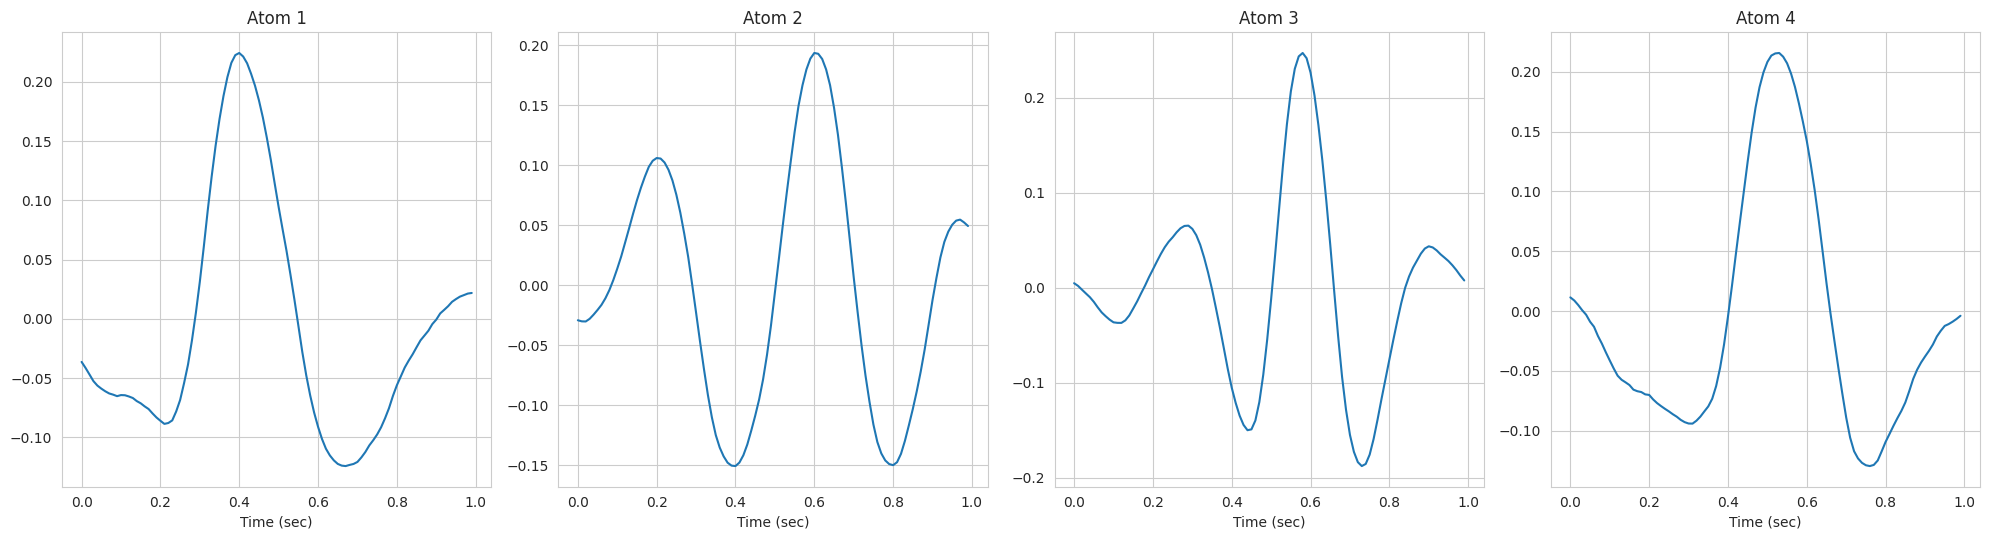

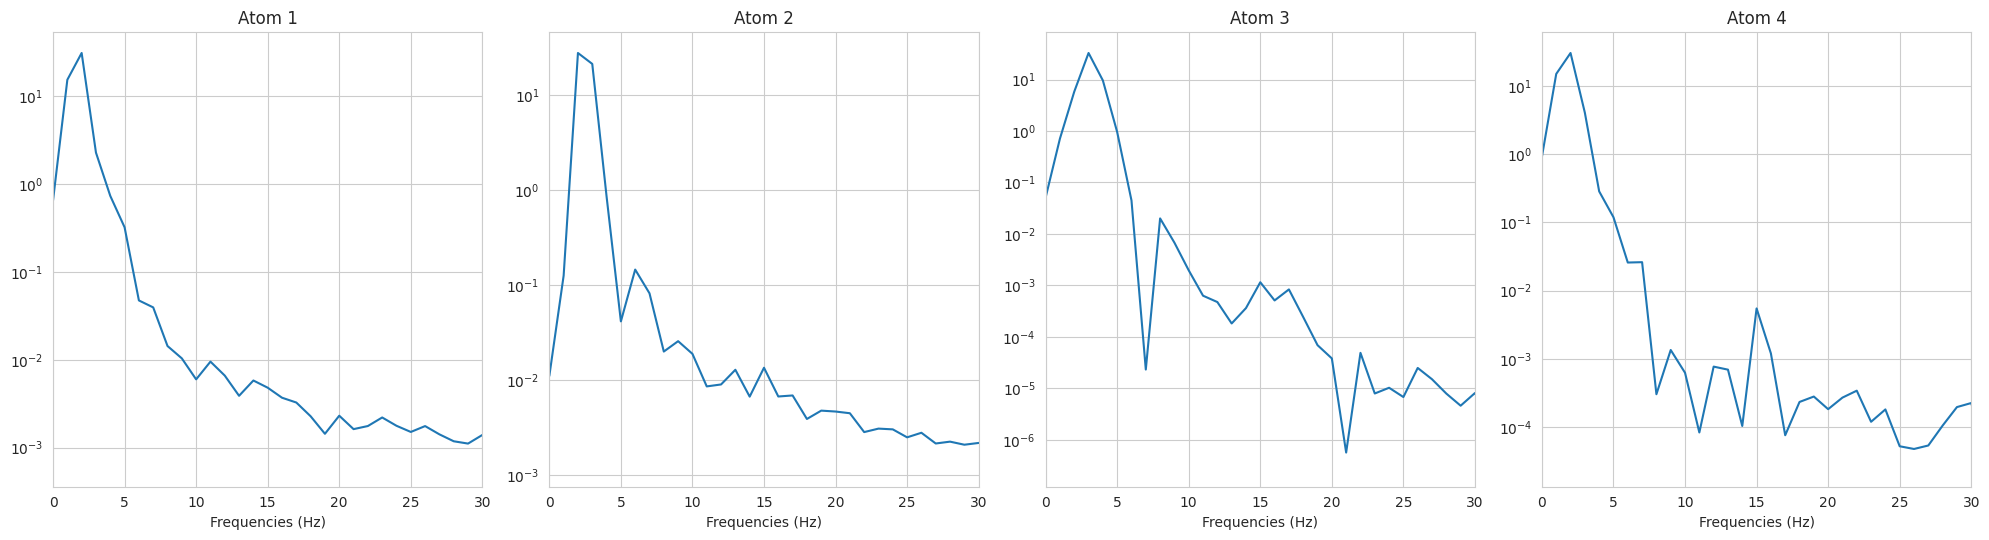

Atom 1
[2.]
 Frequency 2.0
    Delta wave
    1 most relevant channels:
    ['Fpz-Cz']
Atom 2
[2.]
 Frequency 2.0
    Delta wave
    1 most relevant channels:
    ['Fpz-Cz']
Atom 3
[3.]
 Frequency 3.0
    Delta wave
    1 most relevant channels:
    ['Fpz-Cz']
Atom 4
[2.]
 Frequency 2.0
    Delta wave
    1 most relevant channels:
    ['Fpz-Cz']
{0: {'rhythm': 'Delta', 'channels': array(['Fpz-Cz'], dtype='<U6')}, 1: {'rhythm': 'Delta', 'channels': array(['Fpz-Cz'], dtype='<U6')}, 2: {'rhythm': 'Delta', 'channels': array(['Fpz-Cz'], dtype='<U6')}, 3: {'rhythm': 'Delta', 'channels': array(['Fpz-Cz'], dtype='<U6')}}
......................
[BatchCDL] Converged after 22 iteration, (dz, du) = 8.864e-05, 4.113e-05
[BatchCDL] Fit in 113.7s


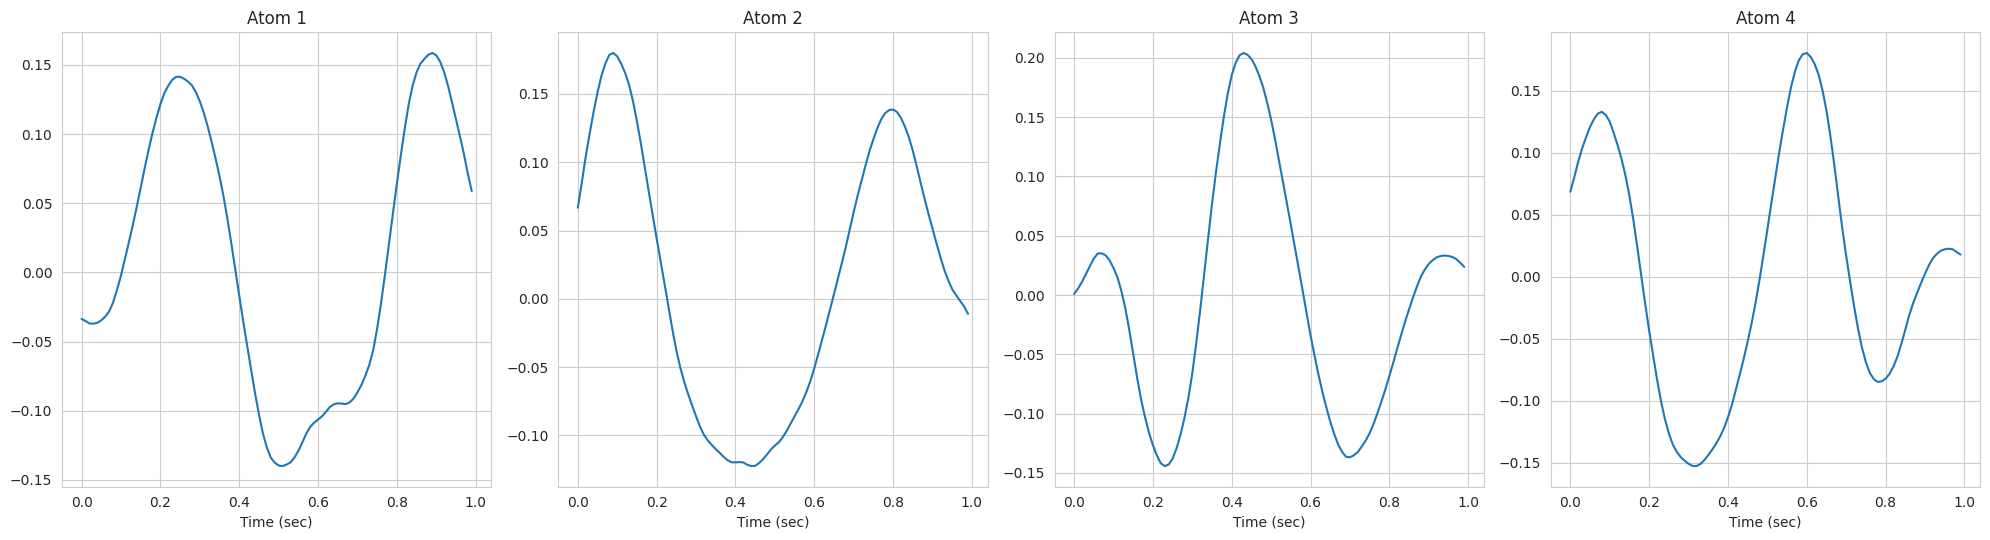

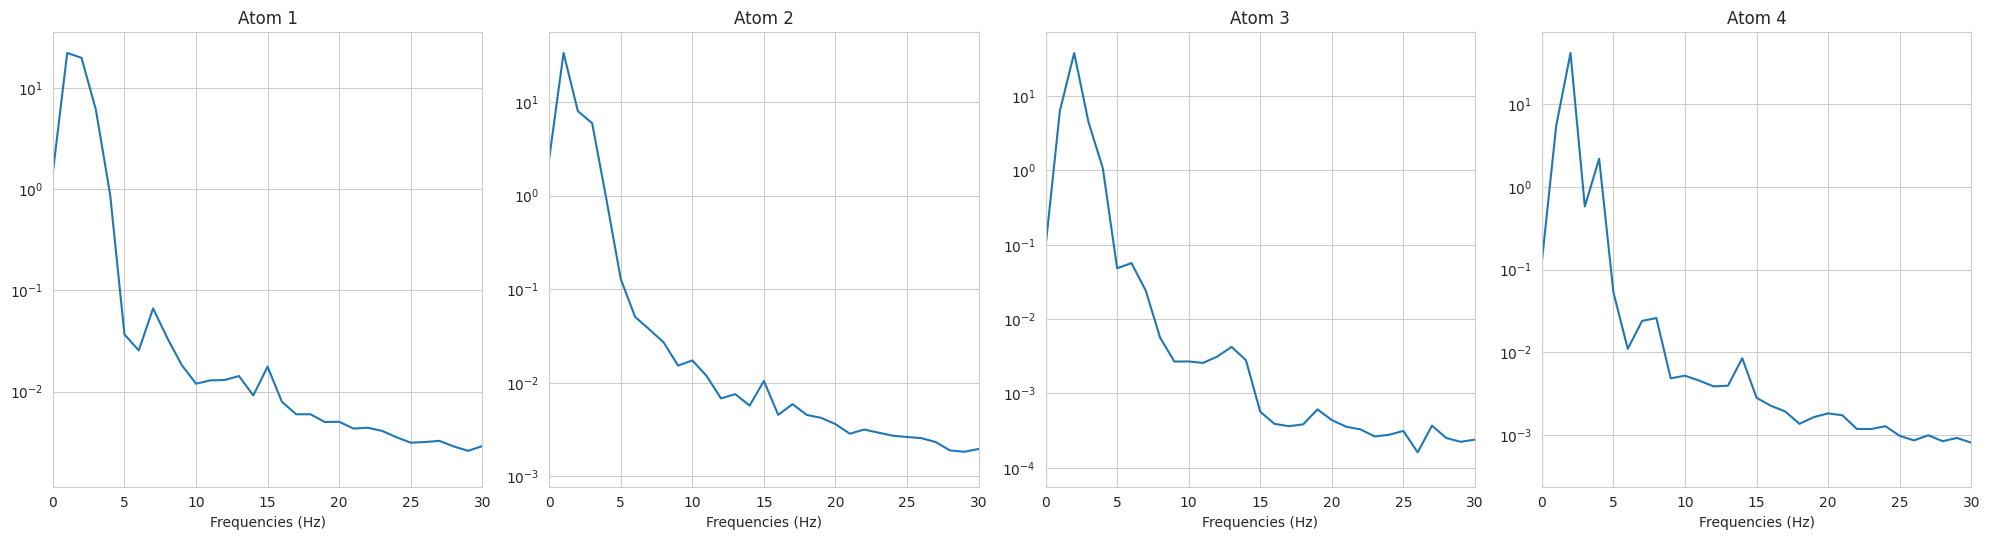

Atom 1
[1.]
 Frequency 1.0
    Delta wave
    1 most relevant channels:
    ['Fpz-Cz']
Atom 2
[1.]
 Frequency 1.0
    Delta wave
    1 most relevant channels:
    ['Fpz-Cz']
Atom 3
[2.]
 Frequency 2.0
    Delta wave
    1 most relevant channels:
    ['Fpz-Cz']
Atom 4
[2.]
 Frequency 2.0
    Delta wave
    1 most relevant channels:
    ['Fpz-Cz']
{0: {'rhythm': 'Delta', 'channels': array(['Fpz-Cz'], dtype='<U6')}, 1: {'rhythm': 'Delta', 'channels': array(['Fpz-Cz'], dtype='<U6')}, 2: {'rhythm': 'Delta', 'channels': array(['Fpz-Cz'], dtype='<U6')}, 3: {'rhythm': 'Delta', 'channels': array(['Fpz-Cz'], dtype='<U6')}}
......
[BatchCDL] Converged after 6 iteration, (dz, du) = 6.722e-05, 5.510e-05
[BatchCDL] Fit in 16.4s


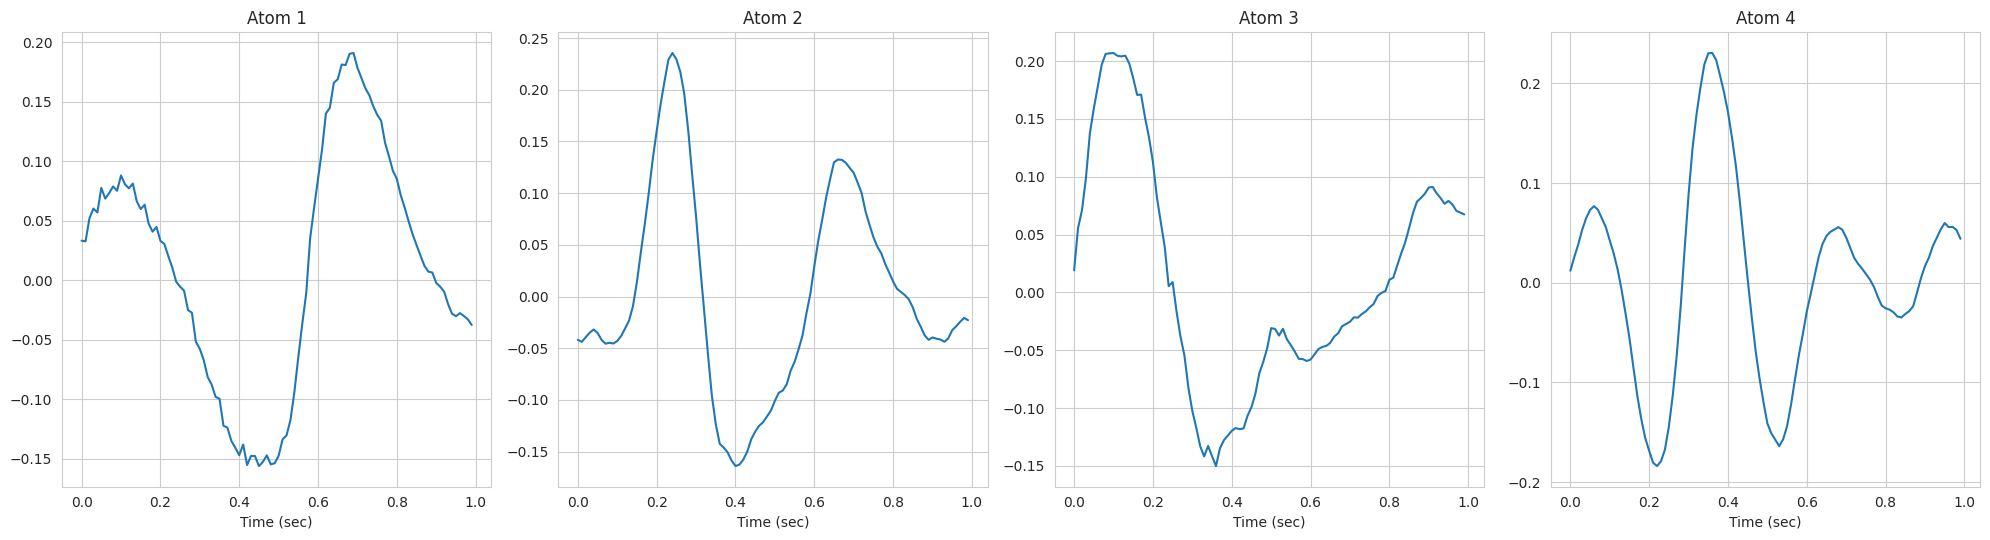

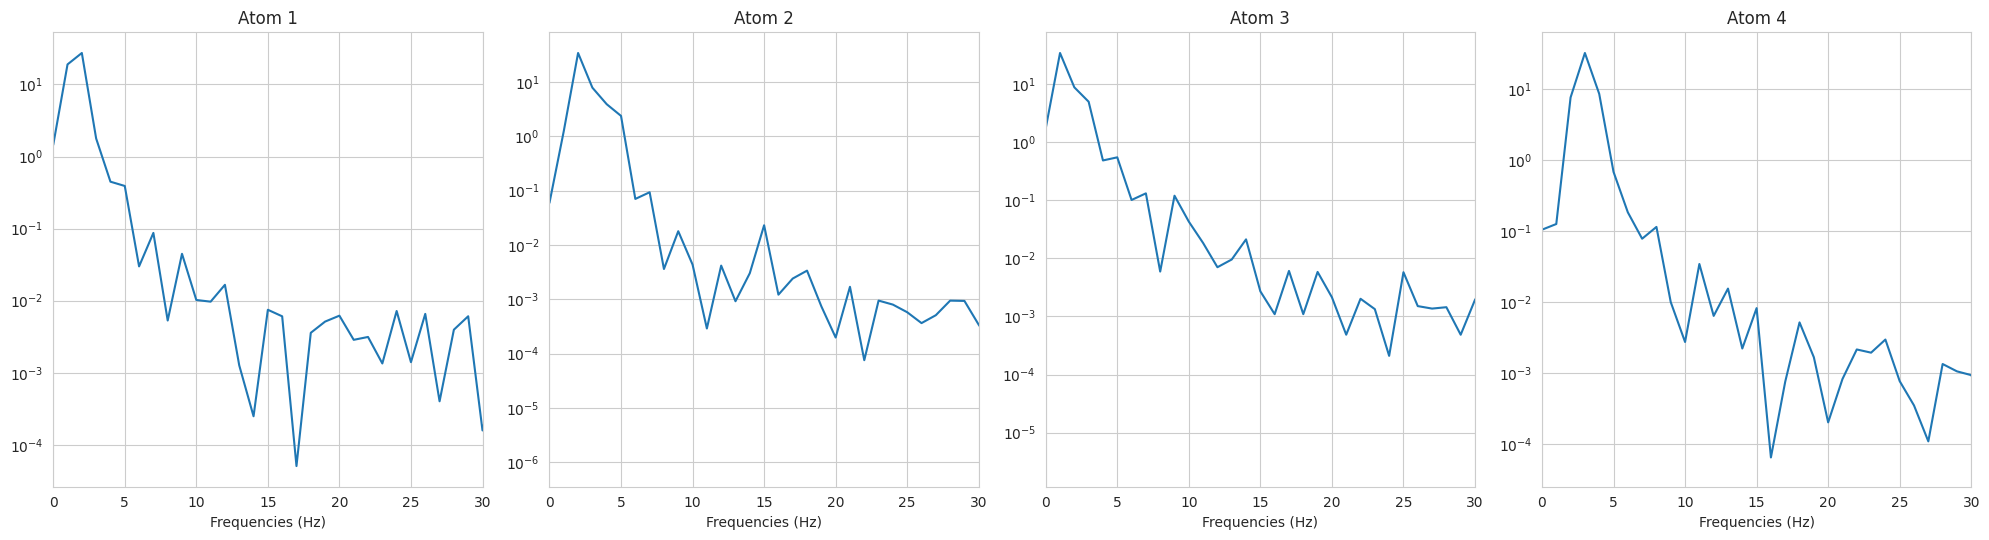

Atom 1
[2.]
 Frequency 2.0
    Delta wave
    1 most relevant channels:
    ['Fpz-Cz']
Atom 2
[2.]
 Frequency 2.0
    Delta wave
    1 most relevant channels:
    ['Fpz-Cz']
Atom 3
[1.]
 Frequency 1.0
    Delta wave
    1 most relevant channels:
    ['Fpz-Cz']
Atom 4
[3.]
 Frequency 3.0
    Delta wave
    1 most relevant channels:
    ['Fpz-Cz']
{0: {'rhythm': 'Delta', 'channels': array(['Fpz-Cz'], dtype='<U6')}, 1: {'rhythm': 'Delta', 'channels': array(['Fpz-Cz'], dtype='<U6')}, 2: {'rhythm': 'Delta', 'channels': array(['Fpz-Cz'], dtype='<U6')}, 3: {'rhythm': 'Delta', 'channels': array(['Fpz-Cz'], dtype='<U6')}}


In [5]:
# Now, we can see the patterns found for each

rhythms = {4:'Delta',
           8:'Theta',
           12:'Alpha-Mu',
           30:'Beta'}

for i, stage in enumerate(stages):

    X_stage = X_stages[stage]

    cdl_stage_ = copy.deepcopy(cdl_stage)
    cdl_stage_.fit(X_stage)

    # display found atoms
    display_atoms(cdl_stage_, n_atoms_stage, 1, 4, sfreq)
    display_ffts(cdl_stage_, n_atoms_stage, 1, 4, sfreq)

    main_rhythm = find_peaks(cdl_stage_, n_atoms_stage, info, figure=False, rows=1, n=1,
                             columns=4, sfreq=100, savefig=f'waves_per_region_{i}', mask=False)

    print(main_rhythm)